In [12]:
Exercise
Download employee retention dataset from here: https://www.kaggle.com/giripujar/hr-analytics.

Now do some exploratory data analysis to figure out which variables have direct and clear impact on employee retention (i.e. whether they leave the company or continue to work)
Plot bar charts showing impact of employee salaries on retention
Plot bar charts showing corelation between department and employee retention
Now build logistic regression model using variables that were narrowed down in step 1
Measure the accuracy of the model

SyntaxError: invalid syntax (2092674641.py, line 2)

In [16]:
# ------------------------------------------------------------
# LOGISTIC REGRESSION EXERCISE - HR ANALYTICS DATASET
# ------------------------------------------------------------

# STEP 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from tkinter import Tk
from tkinter.filedialog import askopenfilename

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report



In [18]:
# ------------------------------------------------------------
# STEP 2: Load Data (with delimiter check)
# ------------------------------------------------------------
filename = "HR_comma_sep.csv"

if os.path.exists(filename):
    try:
        # Try reading normally
        data = pd.read_csv(filename)
    except:
        # Try alternate separator
        data = pd.read_csv(filename, sep=';')
    print(f" File found and loaded successfully: {filename}")
else:
    print(" File not found in current directory.")
    print("Please select the file manually...")
    Tk().withdraw()
    file_path = askopenfilename(title="Select HR_comma_sep.xls.csv file")
    try:
        data = pd.read_csv(file_path)
    except:
        data = pd.read_csv(file_path, sep=';')
    print(f" File loaded successfully from: {file_path}")


 File found and loaded successfully: HR_comma_sep.csv


In [20]:

# ------------------------------------------------------------
# STEP 3: Clean and Inspect Data
# ------------------------------------------------------------
# Sometimes the dataset gets loaded with one string column - fix that
if data.shape[1] == 1:
    data = data[data.columns[0]].str.split(',', expand=True)

# Assign column names if missing
expected_cols = ['satisfaction_level', 'last_evaluation', 'number_project', 
                 'average_montly_hours', 'time_spend_company', 'Work_accident', 
                 'left', 'promotion_last_5years', 'sales', 'salary']
if len(data.columns) == 10:
    data.columns = expected_cols

# Convert numeric columns to float
for col in ['satisfaction_level', 'last_evaluation', 'number_project', 
            'average_montly_hours', 'time_spend_company', 'Work_accident', 
            'left', 'promotion_last_5years']:
    data[col] = pd.to_numeric(data[col], errors='coerce')

print("\n Dataset cleaned successfully!")
display(data.head())
print("\nInfo:")
print(data.info())





 Dataset cleaned successfully!


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB
None



Correlation of features with employee leaving:
left                     1.000000
time_spend_company       0.144822
average_montly_hours     0.071287
number_project           0.023787
last_evaluation          0.006567
promotion_last_5years   -0.061788
Work_accident           -0.154622
satisfaction_level      -0.388375
Name: left, dtype: float64


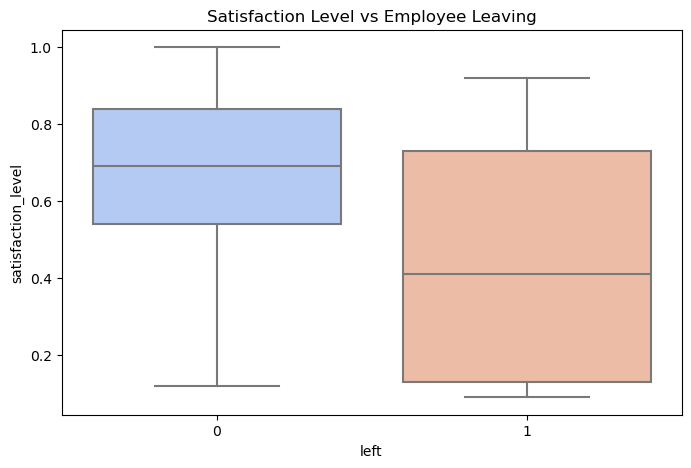

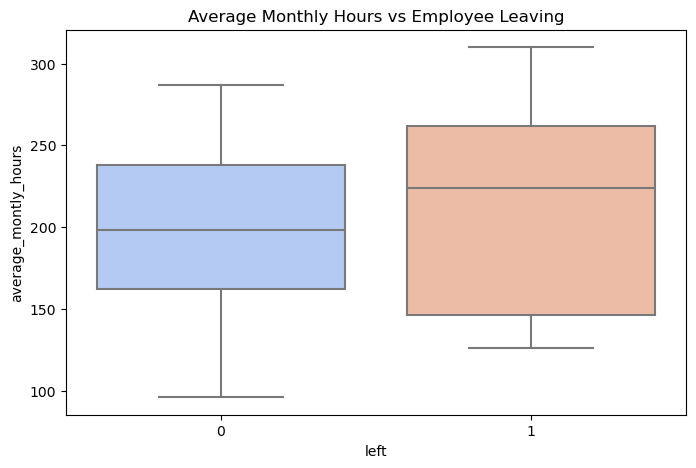

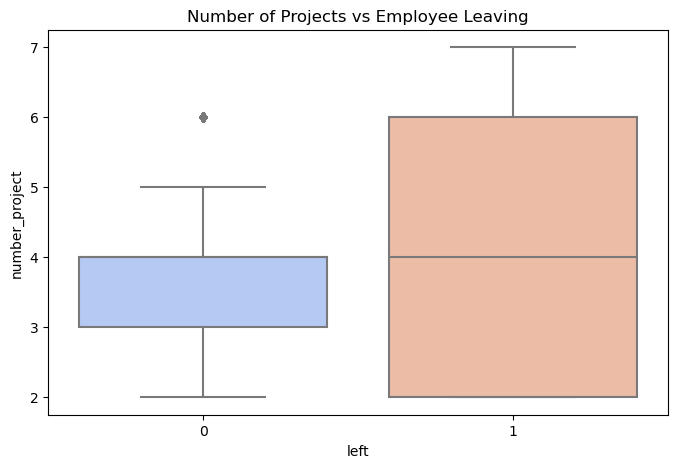

In [22]:
# ------------------------------------------------------------
# STEP 4: Exploratory Data Analysis (EDA)
# ------------------------------------------------------------
corr = data.corr(numeric_only=True)['left'].sort_values(ascending=False)
print("\nCorrelation of features with employee leaving:")
print(corr)

# 4.1 Visualizations
plt.figure(figsize=(8,5))
sns.boxplot(x='left', y='satisfaction_level', data=data, palette='coolwarm')
plt.title('Satisfaction Level vs Employee Leaving')
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(x='left', y='average_montly_hours', data=data, palette='coolwarm')
plt.title('Average Monthly Hours vs Employee Leaving')
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(x='left', y='number_project', data=data, palette='coolwarm')
plt.title('Number of Projects vs Employee Leaving')
plt.show()

AttributeError: 'numpy.int64' object has no attribute 'startswith'

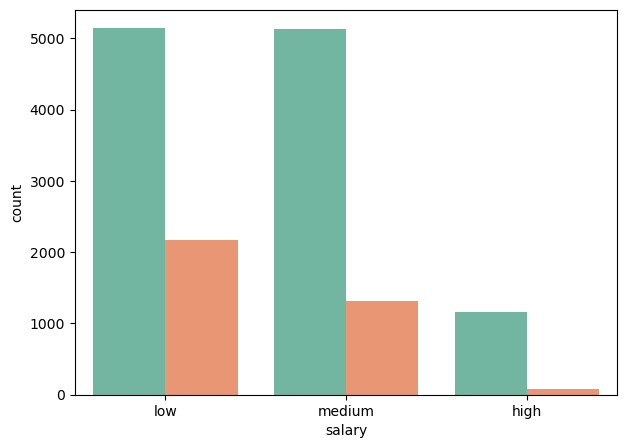

In [24]:
# ------------------------------------------------------------
# STEP 5: Bar charts - Salary and Department impact
# ------------------------------------------------------------
plt.figure(figsize=(7,5))
sns.countplot(x='salary', hue='left', data=data, palette='Set2')
plt.title("Impact of Salary on Employee Retention")
plt.xlabel("Salary Level")
plt.ylabel("Number of Employees")
plt.legend(["Stayed", "Left"])
plt.show()

plt.figure(figsize=(10,5))
sns.countplot(x='sales', hue='left', data=data, palette='Set3')
plt.title("Impact of Department on Employee Retention")
plt.xlabel("Department")
plt.ylabel("Number of Employees")
plt.legend(["Stayed", "Left"])
plt.xticks(rotation=45)
plt.show()

In [ ]:
# STEP 6: Feature Selection and Encoding
# ------------------------------------------------------------
le = LabelEncoder()
data['salary'] = le.fit_transform(data['salary'])
data['sales'] = le.fit_transform(data['sales'])

selected_features = ['satisfaction_level', 'last_evaluation',
                     'number_project', 'average_montly_hours',
                     'time_spend_company', 'salary', 'sales']

X = data[selected_features]
y = data['left']

# ------------------------------------------------------------
# STEP 7: Train/Test Split & Scaling
# ------------------------------------------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.25, random_state=42
)


In [ ]:
# ------------------------------------------------------------
# STEP 8: Logistic Regression Model
# ------------------------------------------------------------
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [29]:
# ------------------------------------------------------------
# STEP 9: Evaluation
# ------------------------------------------------------------
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

print(f"\n Model Accuracy: {acc*100:.2f}%")
print("\nConfusion Matrix:\n", cm)
print("\nClassification Report:\n", cr)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

NameError: name 'y_test' is not defined